## Multinomial Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv('Mnist-train.csv', header = None)
data_test = pd.read_csv('Mnist-test.csv', header = None)

In [5]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 17 columns):
0     7494 non-null int64
1     7494 non-null int64
2     7494 non-null int64
3     7494 non-null int64
4     7494 non-null int64
5     7494 non-null int64
6     7494 non-null int64
7     7494 non-null int64
8     7494 non-null int64
9     7494 non-null int64
10    7494 non-null int64
11    7494 non-null int64
12    7494 non-null int64
13    7494 non-null int64
14    7494 non-null int64
15    7494 non-null int64
16    7494 non-null int64
dtypes: int64(17)
memory usage: 995.4 KB


In [7]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

In [8]:
print(X_train.shape)
print(X_test.shape)

(7494, 16)
(3498, 16)


In [9]:
def mk_labels(y):
    y_new = np.zeros((y.shape[0],10))
    j=0
    for i in y:
        y_new[j,i] = 1
        j+=1
    return y_new.astype(int)

In [10]:
y_train_n = mk_labels(y_train)

In [11]:
print(y_train.head())

0    8
1    2
2    1
3    4
4    1
Name: 16, dtype: int64


In [12]:
print(y_train_n)

[[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [13]:
X_train = X_train.values
X_test = X_test.values

In [14]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)) , X_train) , axis = 1).astype(int)
X_test = np.concatenate((np.ones((X_test.shape[0],1)) , X_test) , axis = 1).astype(int)

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
def stoch_opt(X_train, y_train, lr_rate, epochs):
    W = np.zeros((10,X_train.shape[1]))
    for _ in range(epochs):
        lin = np.dot(X_train , np.transpose(W))
        sig = sigmoid(lin)
        W -= lr_rate * np.dot(np.transpose(sig - y_train) , X_train)
    return W

In [58]:
w = stoch_opt(X_train , y_train_n , 0.00001 , 400)

In [59]:
pred_tr = sigmoid(np.dot(X_train, np.transpose(w)))

In [60]:
pred_tr = np.argmax(pred_tr , axis=1)

In [61]:
np.sum(y_train == pred_tr)/X_train.shape[0]

0.8757672804910596

In [62]:
y_test_n = mk_labels(y_test)
pred_test = sigmoid(np.dot(X_test, np.transpose(w)))
pred_test = np.argmax(pred_test , axis=1)

In [63]:
np.sum(y_test == pred_test)/X_test.shape[0]

0.8198970840480274

The __accuracy__ for the test data is about __82%__

## Naive Bayes

p(c|x) is proportional to p(x|c)p(c) = p(x1|c)p(x2|c)...p(xd|c) (Markov property)

In [75]:
priors = np.zeros((10,1))
data_0 = data_train[data_train[16] == 0]
data_1 = data_train[data_train[16] == 1]
data_2 = data_train[data_train[16] == 2]
data_3 = data_train[data_train[16] == 3]
data_4 = data_train[data_train[16] == 4]
data_5 = data_train[data_train[16] == 5]
data_6 = data_train[data_train[16] == 6]
data_7 = data_train[data_train[16] == 7]
data_8 = data_train[data_train[16] == 8]
data_9 = data_train[data_train[16] == 9]


In [89]:
for i in range(10):
    priors[i] =  np.sum(data_train[16] == i)/data_train.shape[0]

In [140]:
means = data_train.groupby([16]).mean()
variances = data_train.groupby([16]).var()

In [141]:
variances

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
16,,,,,,,,,,,,,,,,
0,513.224153,227.248443,156.114405,472.359099,343.503203,306.617004,720.546335,138.795984,233.179637,519.272458,267.924631,508.978064,650.906506,166.090649,374.168599,549.095505
1,494.431689,323.482512,462.517640,251.865921,395.401041,116.145279,522.604545,421.209203,507.737931,747.148275,948.786025,450.877798,651.868099,107.569714,1322.149067,9.462656
2,352.197062,97.256896,392.528778,5.160633,296.543596,151.382482,348.867838,199.355997,354.471110,169.225476,166.885330,74.589531,143.733075,43.866489,38.889181,32.993088
3,389.287129,48.412915,377.905103,2.199437,177.704177,75.353520,263.381131,66.434629,294.986378,51.574510,140.661415,67.791683,136.855882,16.729747,95.189214,46.111022
4,570.316968,8.946519,303.214935,92.414693,111.341358,118.008565,966.394014,123.402646,379.097546,343.178649,184.633198,240.882565,302.845621,50.166031,668.516565,0.000000
5,812.958505,66.465490,1184.892907,408.315685,540.923688,865.107062,591.223487,1124.174314,712.280822,461.089777,1381.113025,468.779408,196.656745,1939.183725,2247.474548,2078.938369
6,353.320901,12.205216,332.028973,71.719748,204.318583,84.799983,93.243324,112.566603,499.274361,27.312904,483.553979,115.902573,286.503661,85.335557,159.810136,188.943345
7,70.522218,53.716226,401.393726,6.245816,285.671098,151.236251,306.828081,415.659108,412.049918,543.924065,715.161552,292.596026,457.344423,80.382588,805.436772,230.106282
8,916.544132,327.568915,780.046982,430.306267,1240.250894,863.317696,925.429252,852.226161,809.874543,377.172582,1241.446918,712.734659,870.211362,906.607118,1456.644070,415.464550


In [142]:
means

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
16,,,,,,,,,,,,,,,,
0,33.884615,85.924359,10.429487,56.746154,15.702564,17.261538,53.597436,6.420513,88.008974,32.952564,88.725641,70.919231,56.593590,90.384615,19.146154,73.598718
1,11.560976,59.068036,42.505777,75.224647,72.234917,89.650834,81.783055,83.273427,72.240051,57.798460,53.672657,35.731707,46.867779,17.401797,58.559692,1.314506
2,20.180769,77.570513,43.989744,99.466667,69.730769,79.107692,53.561538,45.470513,21.035897,19.261538,10.020513,9.585897,52.234615,5.997436,98.520513,3.115385
3,25.082058,84.121001,56.154381,99.660640,86.592490,84.710709,64.187761,60.681502,80.335188,42.973574,91.190542,17.059805,50.069541,2.171071,3.179416,5.880389
4,39.510256,99.453846,20.873077,78.938462,5.643590,50.212821,41.708974,39.330769,85.803846,48.239744,88.030769,60.056410,71.753846,32.146154,62.942308,0.000000
5,39.418056,90.312500,39.833333,74.244444,57.409722,57.005556,36.812500,27.390278,23.488889,31.558333,34.968056,51.797222,42.616667,61.851389,63.883333,64.354167
6,85.519444,99.058333,49.584722,86.373611,19.463889,57.437500,7.175000,25.470833,35.768056,2.505556,84.561111,11.908333,60.590278,30.231944,10.379167,21.231944
7,3.329049,91.638817,46.544987,99.001285,81.448586,81.104113,71.537275,47.368895,52.064267,14.001285,33.924165,16.929306,37.246787,33.888175,80.487147,34.786632
8,53.979138,80.079277,40.504868,78.703755,54.588317,53.627260,48.429764,26.897079,34.723227,19.134910,43.987483,36.045897,67.798331,66.988873,43.212796,79.058414


__variance__ of the last feature given class 4 is equal to __0!!__ 

__we should be aware of this!__

In [134]:
def x_given_c(x, mean, var):
    p = 1/(np.sqrt(2*np.pi*var)) * np.exp((-(x-mean)**2)/(2*var))
    return p

In [145]:
means = means.values
variances = variances.values

In [146]:
X_test = data_test.iloc[:,:-1]
X_test = X_test.values

In [150]:
P_vals = np.zeros((X_test.shape[0],10))
for i in range(X_test.shape[0]):
    for j in range(10):
        if(j != 4):
            P_vals[i,j] = np.prod(x_given_c(X_test[i,:],means[j,:], variances[j,:])) * priors[j]
        else:
             P_vals[i,j] = np.prod(x_given_c(X_test[i,:-1],means[j,:-1], variances[j,:-1])) * priors[j]

In [151]:
y_pred = np.argmax(P_vals,axis=1)

In [153]:
np.sum(y_pred == y_test)/y_test.shape[0]

0.8224699828473413

The __accuracy__ for the test data is about __82%__

the accuracy for both models are somehow as same as each other. The Markov property that we assumes was not a bad assumption and it was somehow True.

## Syndata using sklearn

In [154]:
data_train = pd.read_csv('Syndata-train.csv')
data_test = pd.read_csv('Syndata-test.csv')

In [155]:
data_train.head()

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0


In [156]:
y_train = data_train['label'].values
X_train = data_train.iloc[:,:-1].values
y_test = data_test['label'].values
X_test = data_test.iloc[:,:-1].values

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression( solver = 'lbfgs')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [161]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.928
Precision: 0.9417879417879418
Recall: 0.9114688128772636
Error type 1: 0.055666003976143144
Error type 2: 0.08853118712273644
[[475  28]
 [ 44 453]]


Text(0.5, 257.44, 'Predicted label')

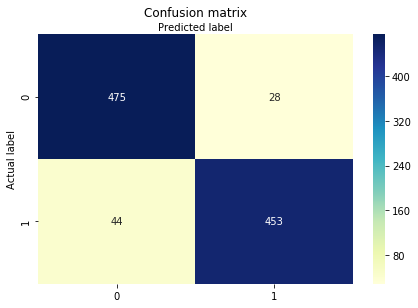

In [162]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [164]:
print(model.coef_)

[[4.45641823 1.06285644]]


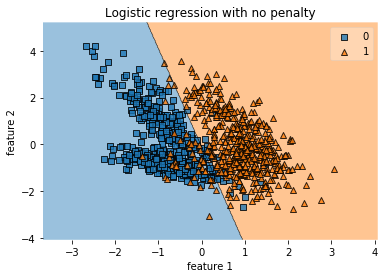

In [169]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=1)

# Adding axes annotations
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Logistic regression with no penalty')
plt.show()

In [173]:
model = LogisticRegression( solver = 'liblinear' , penalty='l1' , C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [174]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.929
Precision: 0.94375
Recall: 0.9114688128772636
Error type 1: 0.0536779324055666
Error type 2: 0.08853118712273644
[[476  27]
 [ 44 453]]


Text(0.5, 257.44, 'Predicted label')

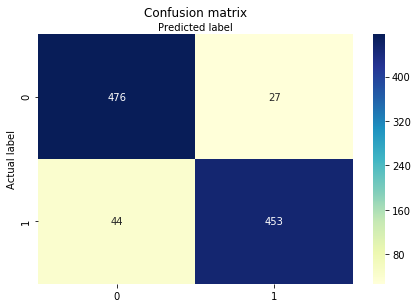

In [175]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [176]:
print(model.coef_)

[[4.29269027 0.99450382]]


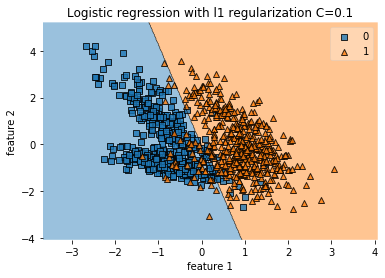

In [178]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=1)

# Adding axes annotations
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Logistic regression with l1 regularization C=0.1')
plt.show()

In [183]:
model = LogisticRegression( solver = 'liblinear' , penalty='l1' , C=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [184]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.924
Precision: 0.9376299376299376
Recall: 0.9074446680080482
Error type 1: 0.05964214711729622
Error type 2: 0.09255533199195176
[[473  30]
 [ 46 451]]


Text(0.5, 257.44, 'Predicted label')

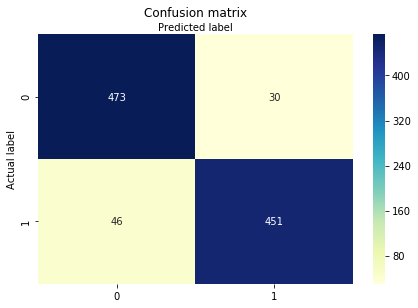

In [185]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [186]:
print(model.coef_)

[[3.0027118  0.54649813]]


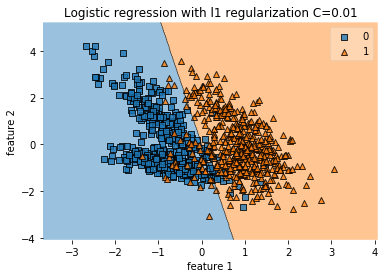

In [188]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=1)

# Adding axes annotations
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Logistic regression with l1 regularization C=0.01')
plt.show()

In [189]:
model = LogisticRegression( solver = 'lbfgs' , penalty='l2' , C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [190]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.928
Precision: 0.9417879417879418
Recall: 0.9114688128772636
Error type 1: 0.055666003976143144
Error type 2: 0.08853118712273644
[[475  28]
 [ 44 453]]


Text(0.5, 257.44, 'Predicted label')

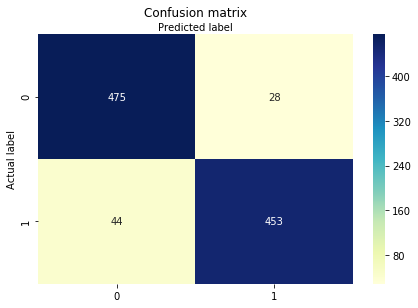

In [191]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [192]:
print(model.coef_)

[[3.83672701 0.89718383]]


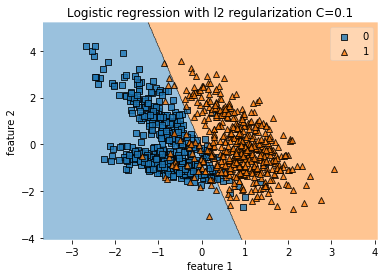

In [193]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=1)

# Adding axes annotations
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Logistic regression with l2 regularization C=0.1')
plt.show()

In [194]:
model = LogisticRegression( solver = 'lbfgs' , penalty='l2' , C=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [195]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.929
Precision: 0.9456066945606695
Recall: 0.9094567404426559
Error type 1: 0.05168986083499006
Error type 2: 0.0905432595573441
[[477  26]
 [ 45 452]]


Text(0.5, 257.44, 'Predicted label')

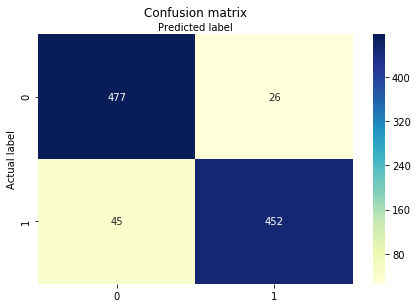

In [196]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [197]:
print(model.coef_)

[[2.30328743 0.48710126]]


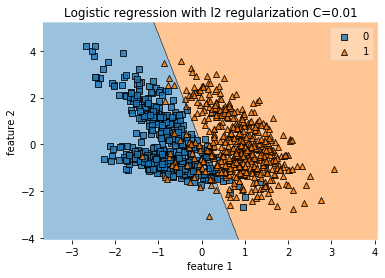

In [199]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=1)

# Adding axes annotations
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Logistic regression with l2 regularization C=0.01')
plt.show()

as we can see when we increase the lambda (decreasing C), the penalty(regulatization) term got __larger__ and the wight matrix elements got __smaller__.
for L1 regularization it tries to make one feature 0 (we can use it as feature selection) but with l2 regularization it tries to make both feature small

## finding best parameters

In [200]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
param_grid = { 
    'penalty' : ['l1', 'l2'],
    'C' : [1000, 100, 20, 10, 4, 2, 1, 0.2, 0.1, 0.05, 0.02, 0.014, 0.01],
    'solver' : ['liblinear']}

clf=GridSearchCV(model,param_grid, cv=10, verbose=True)
clf.fit(X_train,y_train)
logreg_best_params = clf.best_params_
print(logreg_best_params)
print(clf.best_score_)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.922


[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished


The best parameters are __{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}__

In [202]:
best = LogisticRegression( solver = 'liblinear' , penalty='l1' , C=0.1)
best.fit(X_train,y_train)
y_pred = best.predict(X_test)

In [203]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
error1 = conf_mat[0][1]/(conf_mat[0][0]+conf_mat[0][1])
error2 = 1-metrics.recall_score(y_test, y_pred)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Error type 1:",error1)
print("Error type 2:",error2)
print(conf_mat)

Accuracy: 0.929
Precision: 0.94375
Recall: 0.9114688128772636
Error type 1: 0.0536779324055666
Error type 2: 0.08853118712273644
[[476  27]
 [ 44 453]]


Text(0.5, 257.44, 'Predicted label')

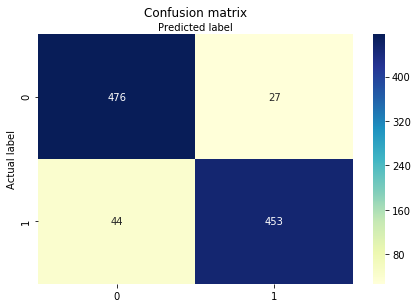

In [204]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')